# Create networks using preferential attachment model

- Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?

In [2]:
library('igraph')
library('Matrix')
library('pracma')

[1] TRUE

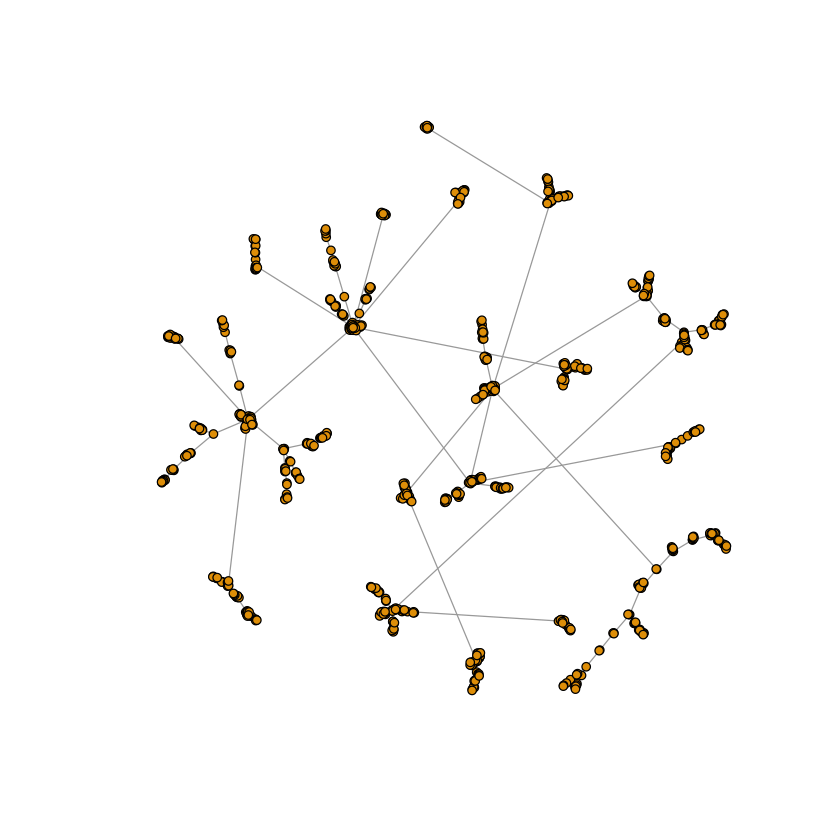

In [5]:
rm(list=ls()) # clear workspace 
g <- sample_pa(1000, m = 1, directed = FALSE)
is.connected(g)
plot(g, vertex.size=3, vertex.label=NA)

- Use fast greedy method to find the community structure. Mea- sure modularity.

In [7]:
fc <- cluster_fast_greedy(g)
modularity(fc)

[1] 0.9319415

- Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?

[1] 0.9783496

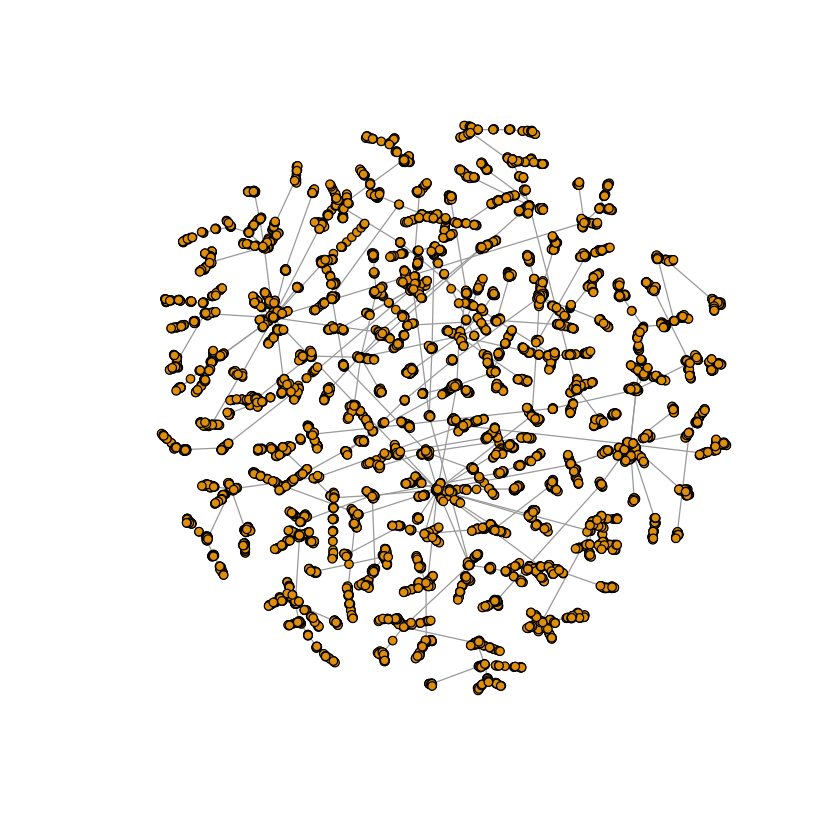

In [8]:
g_large <- sample_pa(10000,m = 1,directed = FALSE)
fc_large <- cluster_fast_greedy(g_large)
modularity(fc_large)
plot(g_large, vertex.size=3, vertex.label=NA)

- Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot.


Call:
lm(formula = deglog ~ xlog)

Coefficients:
(Intercept)         xlog  
     0.8579      -2.5372  


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“20 y values <= 0 omitted from logarithmic plot”


Call:
lm(formula = deglog ~ xlog)

Coefficients:
(Intercept)         xlog  
      1.207       -2.908  


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“37 y values <= 0 omitted from logarithmic plot”

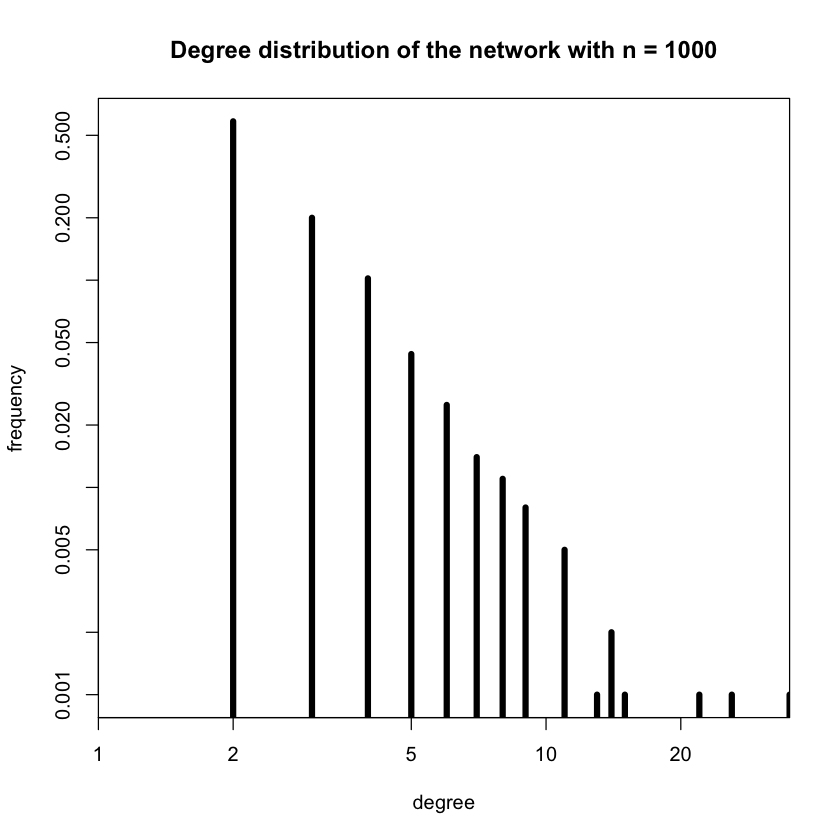

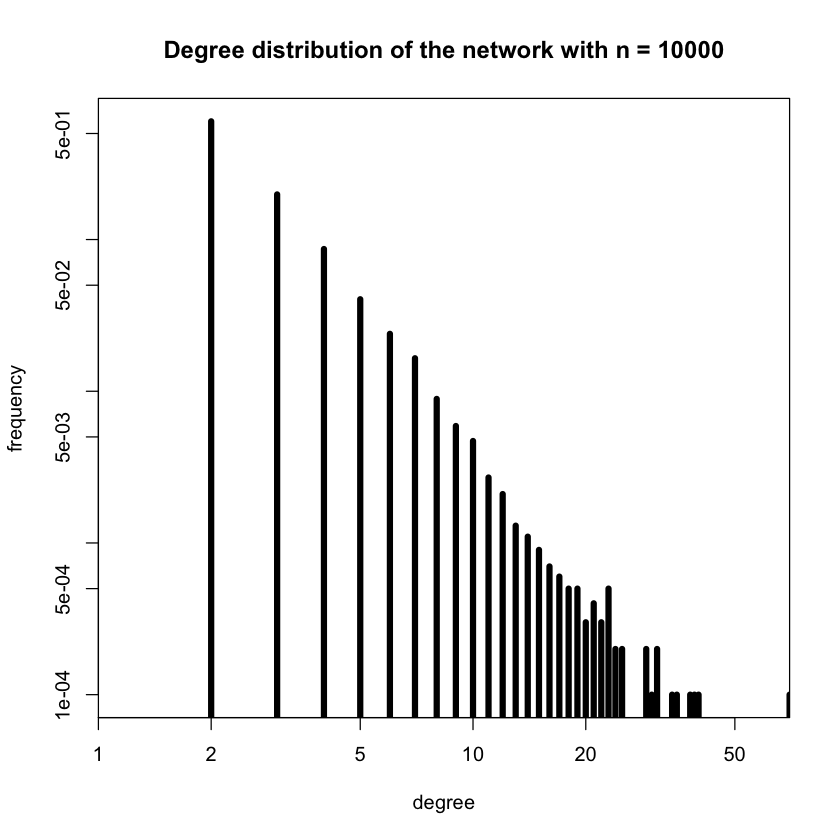

In [75]:
deg <- degree.distribution(g)
deglog <- log(deg)
remove <- is.infinite(deglog)
deglog <- log(deg[!remove])
xlog <- 1:length(deg)
xlog <- log(xlog[!remove])
lm(deglog~xlog)
plot(deg,log='xy', type='h', lwd  = 5, xaxs="i",
     xlab = "degree",ylab = "frequency",main="Degree distribution of the network with n = 1000")

deg <- degree.distribution(g_large)
deglog <- log(deg)
remove <- is.infinite(deglog)
deglog <- log(deg[!remove])
xlog <-  1:length(deg)
xlog <- log(xlog[!remove])
lm(deglog~xlog)
plot(degree.distribution(g_large),log='xy', type='h', lwd  = 5, xaxs="i",
     xlab = "degree",ylab = "frequency",main="Degree distribution of the network with n = 10000")

- You can randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. How does this differ from the node degree distribution?

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“19 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“36 y values <= 0 omitted from logarithmic plot”

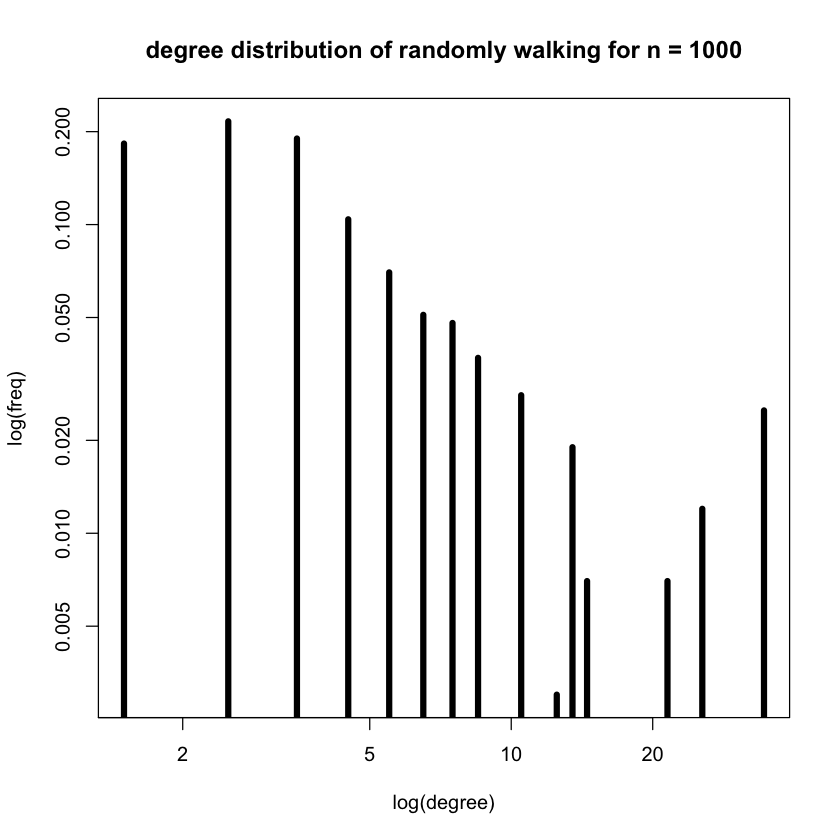

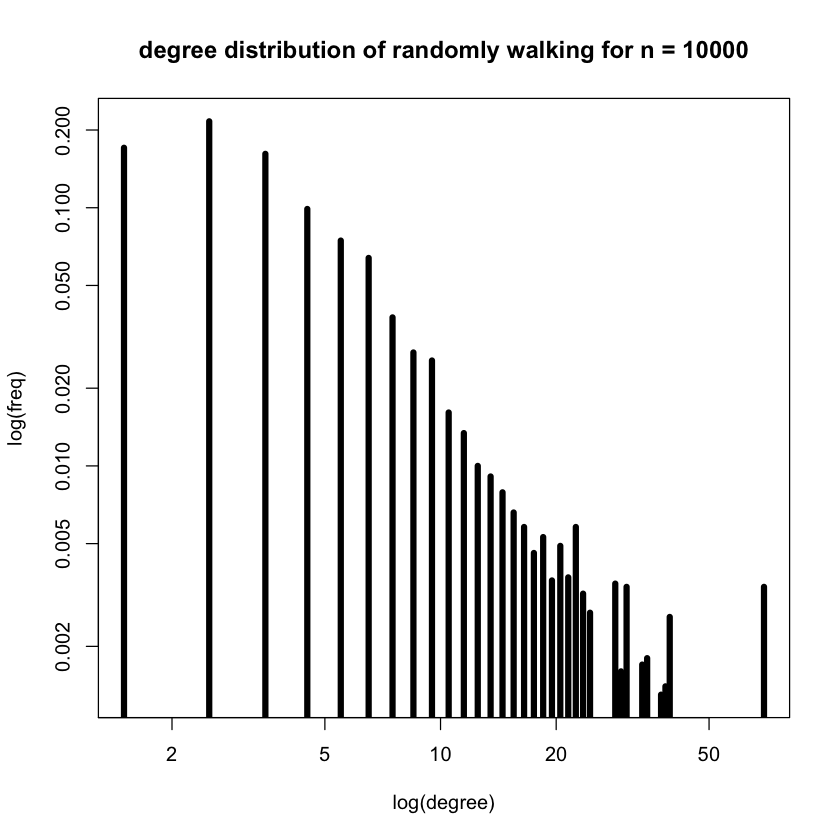

In [79]:
#pdf("1_2_e_degsmall.pdf")
deg_small <- integer(1000)
for (i in 1:1000){
    tem <- random_walk(g, start = i, steps = 2)[c(2)]
    deg_small[c(i)] <- degree(g, v = tem)
}
hist_walk_small <- hist(deg_small,breaks = seq(min(deg_small)-0.5, max(deg_small)+0.5, by=1), plot='FALSE')
plot(hist_walk_small$breaks[-1], hist_walk_small$counts / 1000, log='xy', type='h',
     xlab = "log(degree)",ylab = "log(freq)",lwd  = 5, main = 'degree distribution of randomly walking for n = 1000')

#dev.off()

#pdf("1_2_e_deglarge.pdf")
deg_large <- integer(10000)
for (i in 1:10000){
    tem <- random_walk(g_large, start = i, steps = 2)[c(2)]
    deg_large[c(i)] <- degree(g_large, v = tem)
}
hist_walk_large <- hist(deg_large, breaks = seq(min(deg_large)-0.5, max(deg_large)+0.5, by=1), plot='FALSE')
plot(hist_walk_large$breaks[-1], hist_walk_large$counts / 10000, log='xy', type='h',
     xlab = "log(degree)",ylab = "log(freq)",lwd  = 5, main = 'degree distribution of randomly walking for n = 10000')
#dev.off()

- Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

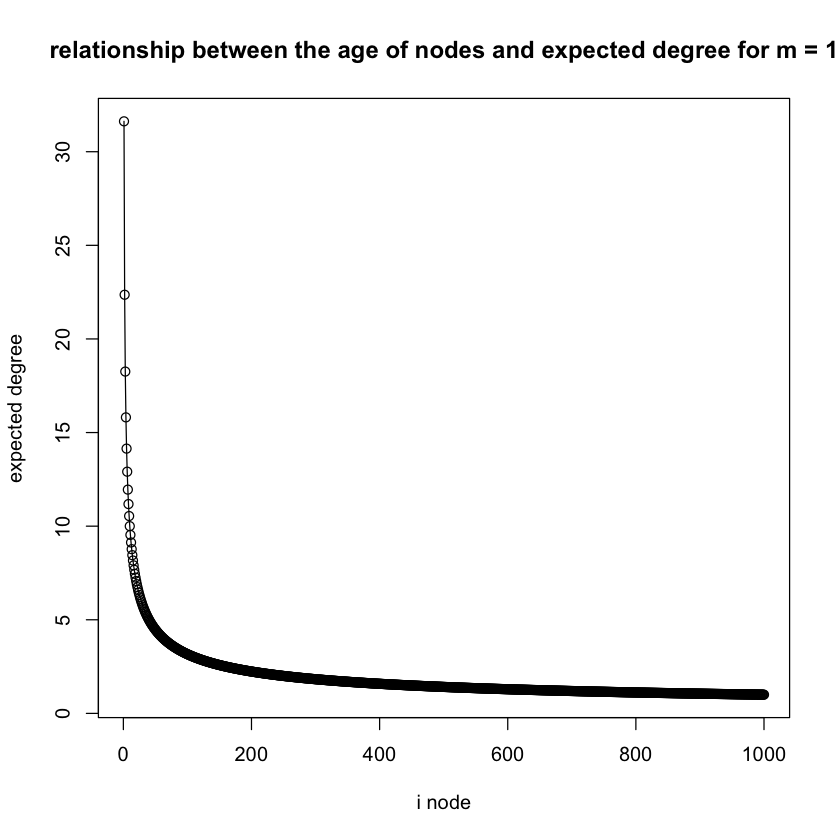

In [81]:
#pdf("1_2_f.pdf")
exp_deg <- integer(1000)
for (i in 1:1000){
    exp_deg[c(i)] <- sqrt(1000/i)
}
plot(exp_deg, type = "o", xlab = 'i node', ylab = 'expected degree',
     main ='relationship between the age of nodes and expected degree for m = 1')
#dev.off()

- Repeat the previous parts for m = 2, and m = 5. Why was modularity for m = 1 high?

[1] TRUE

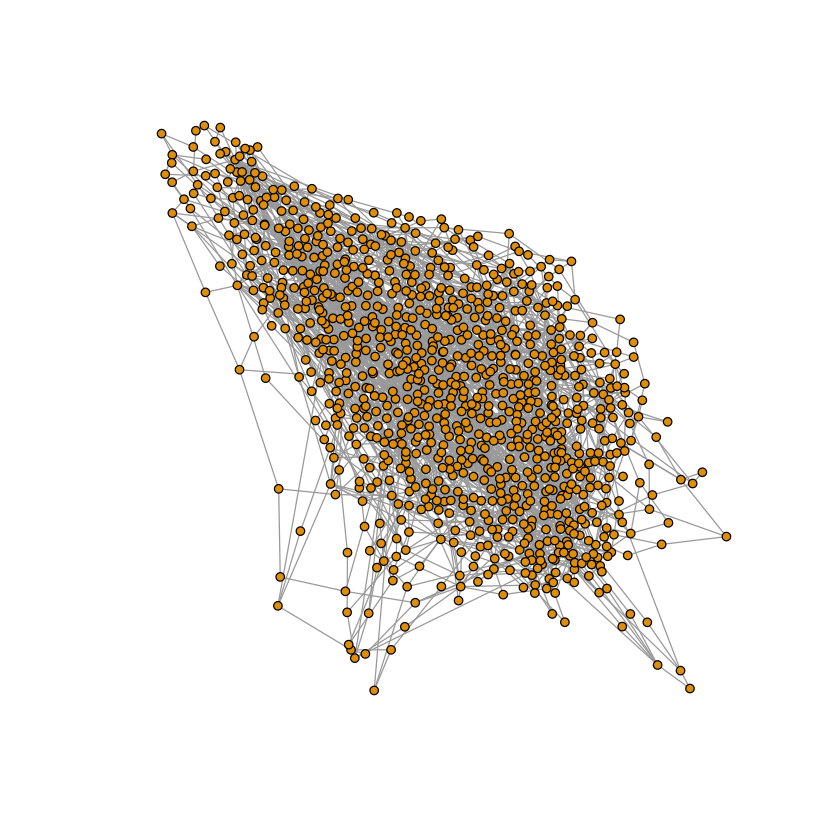

In [85]:
rm(list=ls()) # clear workspace 
#pdf("report part2/img/2_g_1_network.pdf")
g <- sample_pa(1000, m = 2, directed = FALSE)
is.connected(g)
plot(g, vertex.size=3, vertex.label=NA)
#dev.off()

In [86]:
fc <- cluster_fast_greedy(g)
modularity(fc)

[1] 0.5214553

[1] 0.5301828

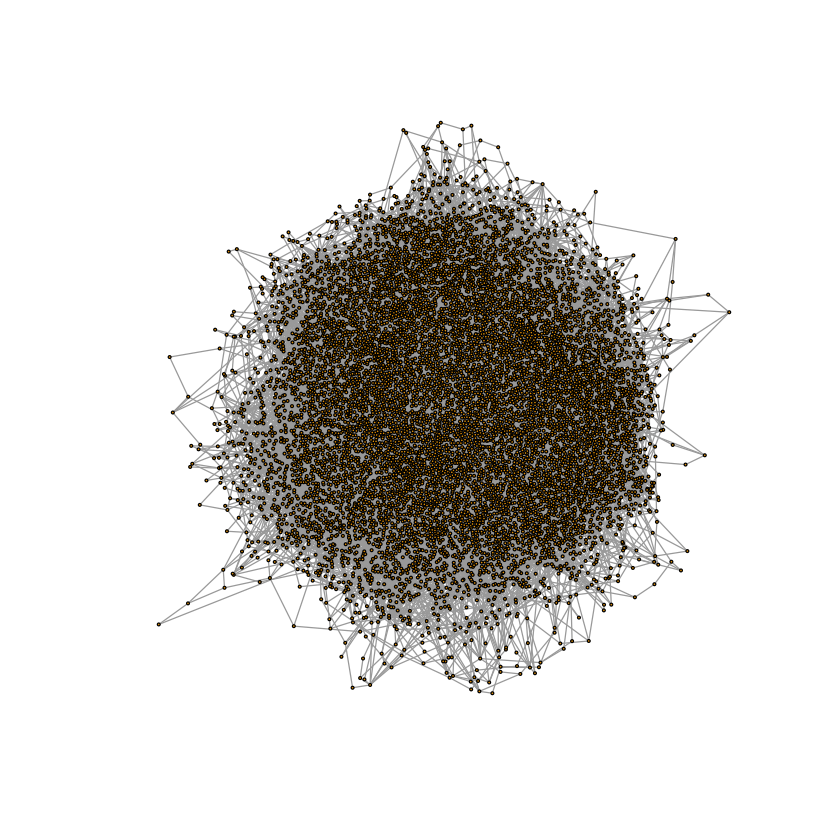

In [95]:
g_large <- sample_pa(10000,m = 2,directed = FALSE)
fc_large <- cluster_fast_greedy(g_large)
modularity(fc_large)
#pdf("report part2/img/2_g_1_network2.pdf")
plot(g_large, vertex.size=1, vertex.label=NA)
#dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“30 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“112 y values <= 0 omitted from logarithmic plot”

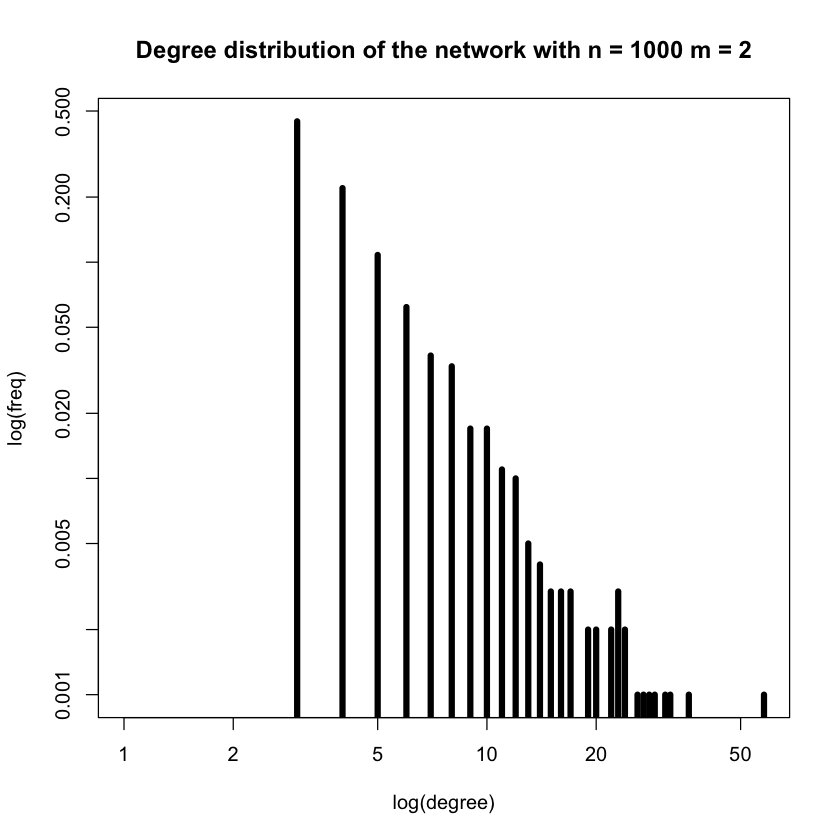

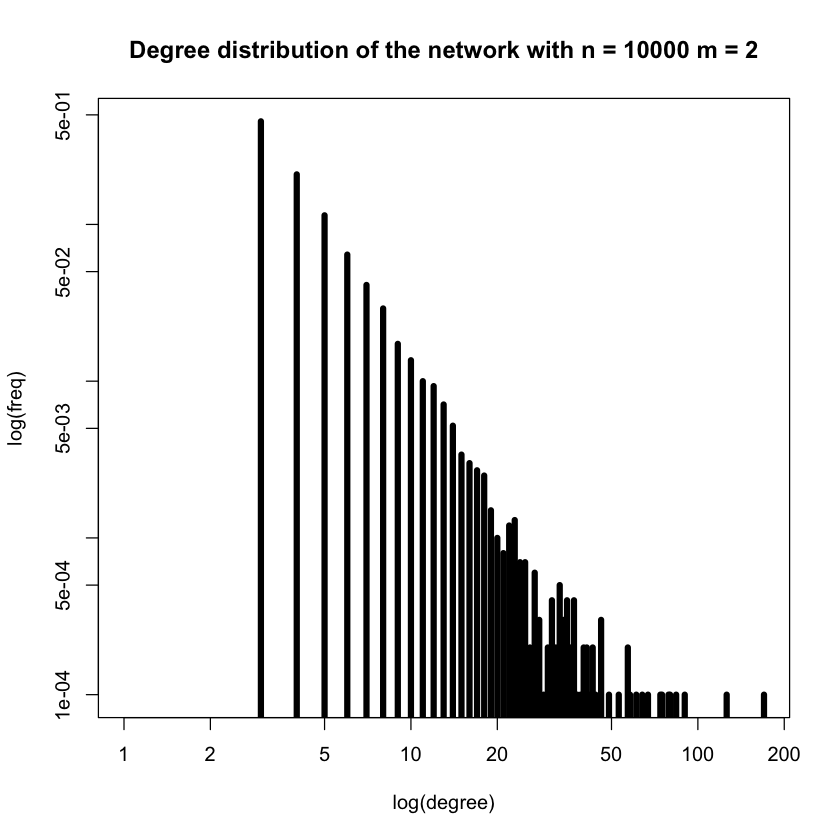

In [93]:
plot(degree.distribution(g),log='xy', type='h', lwd  = 5,
     xlab = "log(degree)",ylab = "log(freq)",main="Degree distribution of the network with n = 1000 m = 2")
plot(degree.distribution(g_large),log='xy', type='h', lwd  = 5,
     xlab = "log(degree)",ylab = "log(freq)",main="Degree distribution of the network with n = 10000 m = 2")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1072 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“777 y values <= 0 omitted from logarithmic plot”

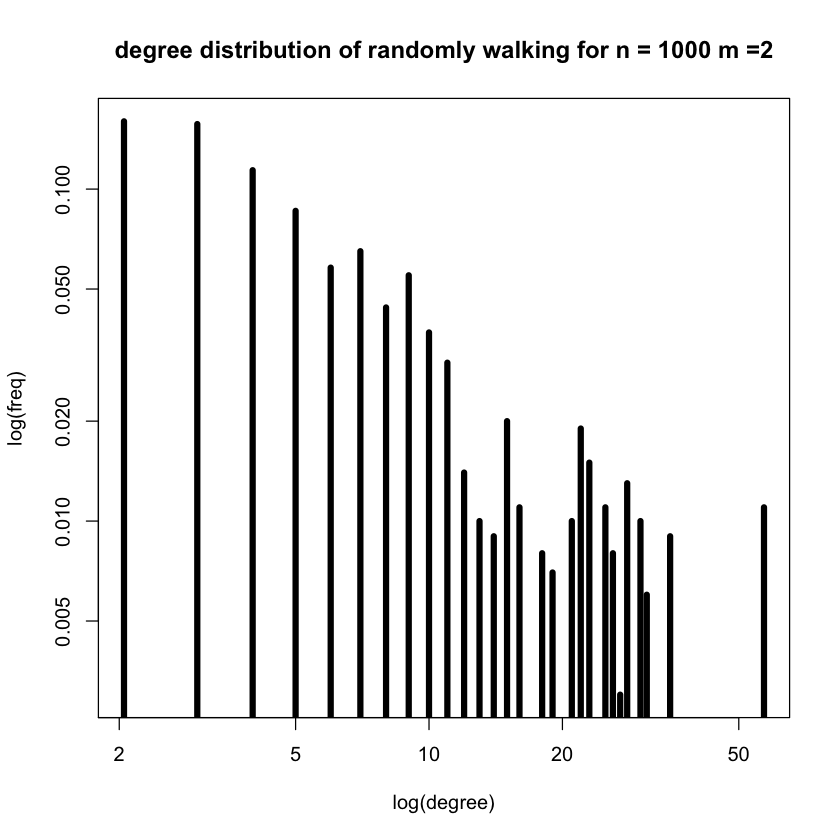

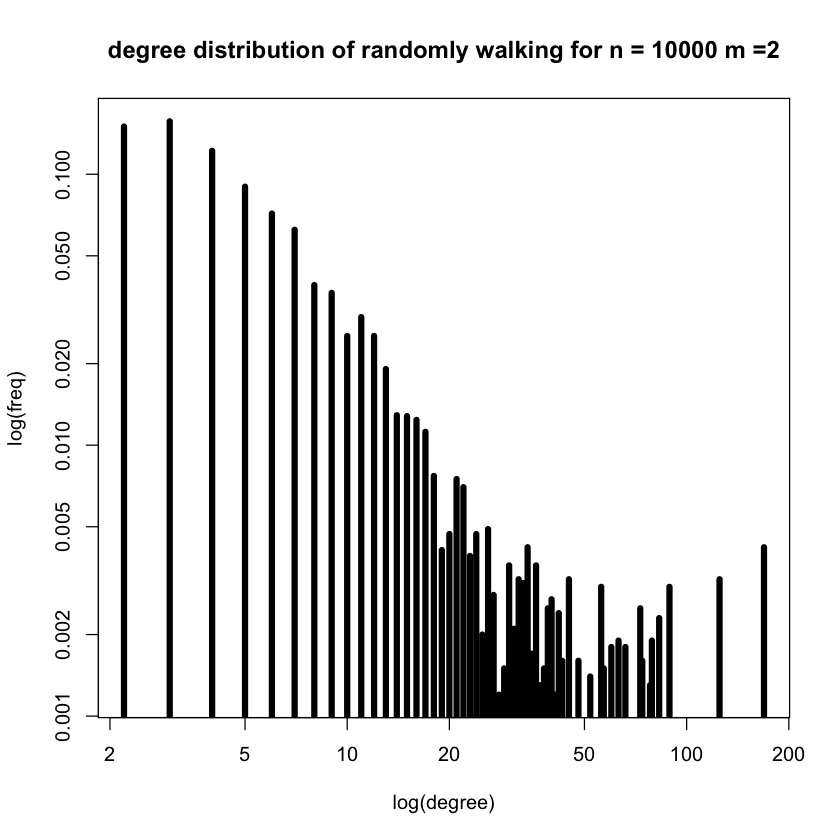

In [94]:
deg_small <- integer(1000)
for (i in 1:1000){
    tem <- random_walk(g, start = i, steps = 2)[c(2)]
    deg_small[c(i)] <- degree(g, v = tem)
}
hist_walk_small <- hist(deg_small,breaks = 1000, plot='FALSE')
plot(hist_walk_small$breaks[-1], hist_walk_small$counts / 1000, log='xy', type='h',
     xlab = "log(degree)",ylab = "log(freq)",lwd  = 5, main = 'degree distribution of randomly walking for n = 1000 m =2')

deg_large <- integer(10000)
for (i in 1:10000){
    tem <- random_walk(g_large, start = i, steps = 2)[c(2)]
    deg_large[c(i)] <- degree(g_large, v = tem)
}
hist_walk_large <- hist(deg_large, breaks = 1000, plot='FALSE')
plot(hist_walk_large$breaks[-1], hist_walk_large$counts / 10000, log='xy', type='h',
     xlab = "log(degree)",ylab = "log(freq)",lwd  = 5, main = 'degree distribution of randomly walking for n = 10000 m =2')

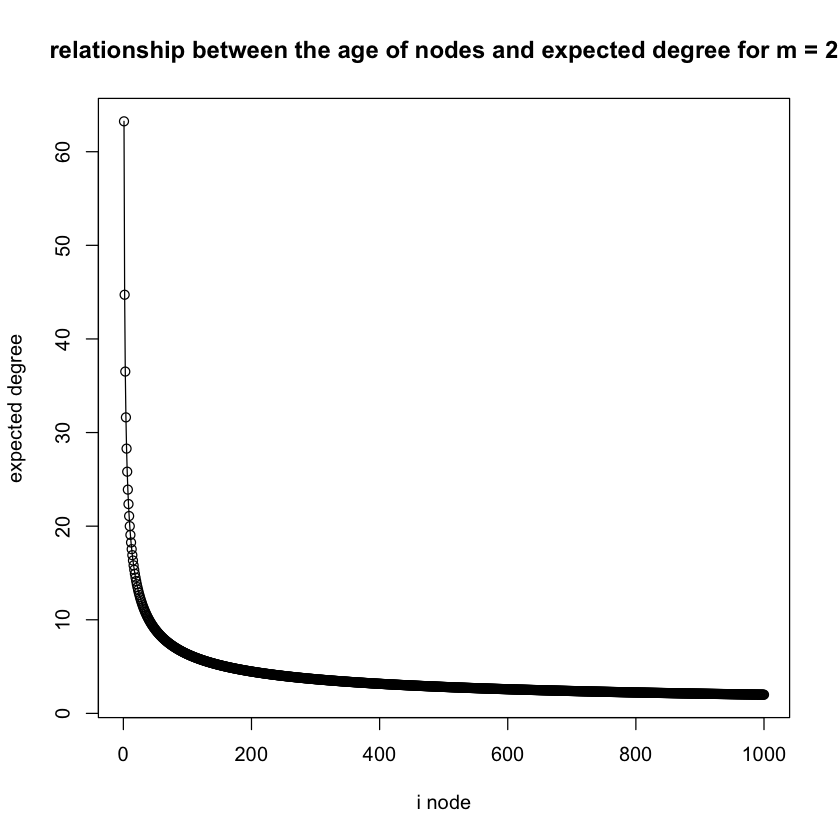

In [95]:
exp_deg <- integer(1000)
for (i in 1:1000){
    exp_deg[c(i)] <- 2 * sqrt(1000/i)
}
plot(exp_deg, type = "o", xlab = 'i node', ylab = 'expected degree',
     main ='relationship between the age of nodes and expected degree for m = 2')

In [96]:
g <- sample_pa(1000, m = 5, directed = FALSE)
is.connected(g)

[1] TRUE

In [97]:
fc <- cluster_fast_greedy(g)
modularity(fc)

[1] 0.2724929

In [98]:
g_large <- sample_pa(10000,m = 5,directed = FALSE)
fc_large <- cluster_fast_greedy(g_large)
modularity(fc_large)

[1] 0.2721967

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“91 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“194 y values <= 0 omitted from logarithmic plot”

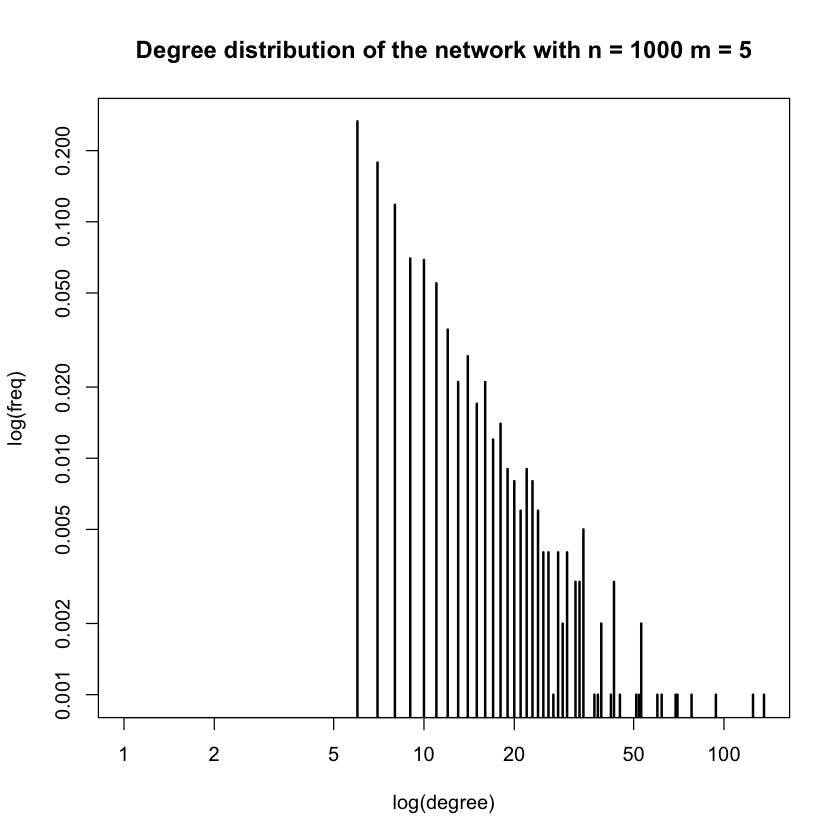

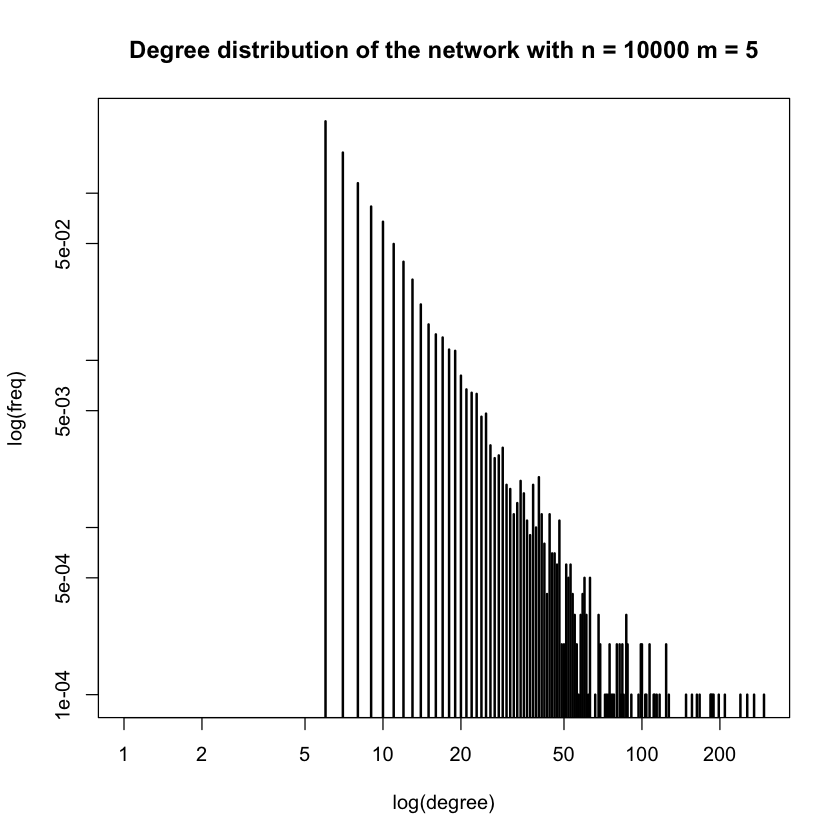

In [101]:
plot(degree.distribution(g),log='xy', type='h', lwd  = 2,
     xlab = "log(degree)",ylab = "log(freq)",main="Degree distribution of the network with n = 1000 m = 5")
plot(degree.distribution(g_large),log='xy', type='h', lwd  = 2,
     xlab = "log(degree)",ylab = "log(freq)",main="Degree distribution of the network with n = 10000 m = 5")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1255 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“478 y values <= 0 omitted from logarithmic plot”

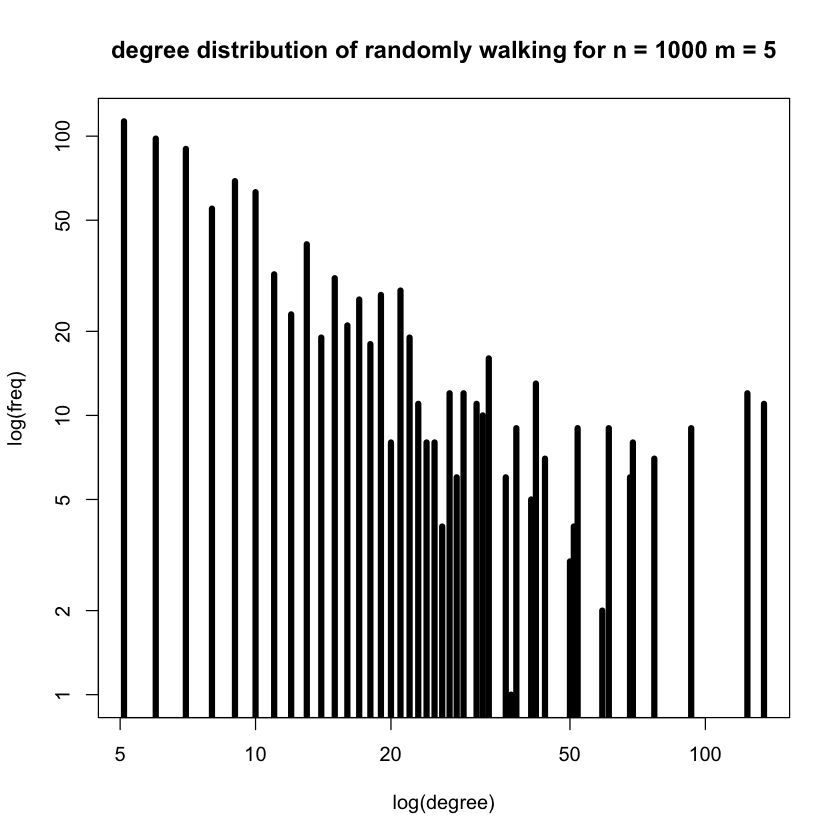

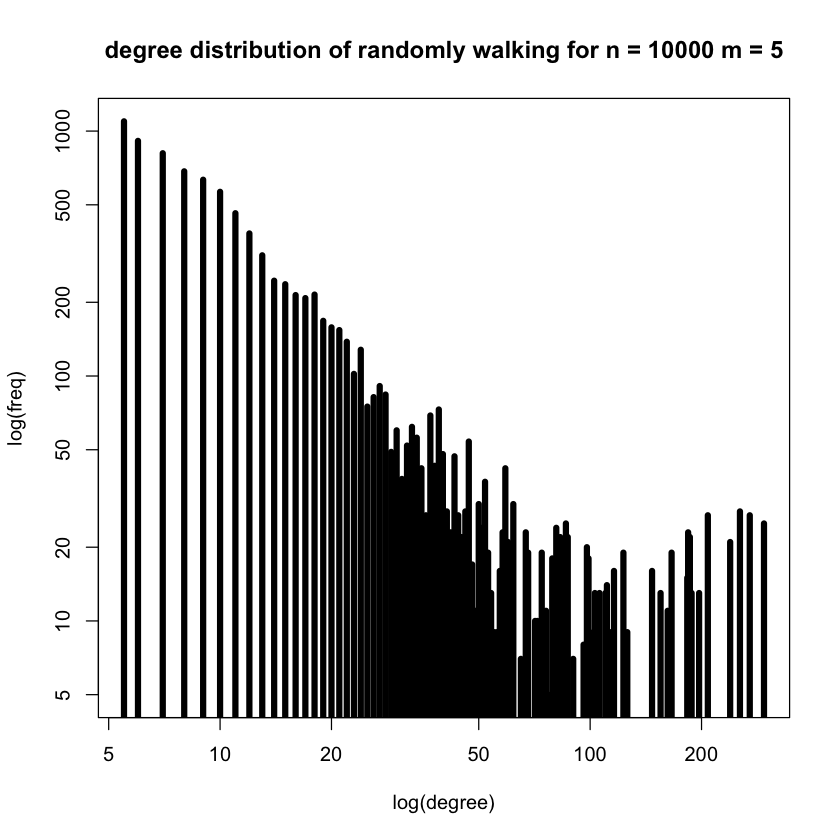

In [103]:
deg_small <- integer(1000)
for (i in 1:1000){
    tem <- random_walk(g, start = i, steps = 2)[c(2)]
    deg_small[c(i)] <- degree(g, v = tem)
}
hist_walk_small <- hist(deg_small,plot='FALSE',breaks = 1000,)
plot(hist_walk_small$breaks[-1], hist_walk_small$counts, log='xy', type='h',
     xlab = "log(degree)",ylab = "log(freq)",lwd  = 5, main = 'degree distribution of randomly walking for n = 1000 m = 5')

deg_large <- integer(10000)
for (i in 1:10000){
    tem <- random_walk(g_large, start = i, steps = 2)[c(2)]
    deg_large[c(i)] <- degree(g_large, v = tem)
}
hist_walk_large <- hist(deg_large,plot='FALSE',breaks = 1000,)
plot(hist_walk_large$breaks[-1], hist_walk_large$counts, log='xy', type='h',
     xlab = "log(degree)",ylab = "log(freq)",lwd  = 5, main = 'degree distribution of randomly walking for n = 10000 m = 5')

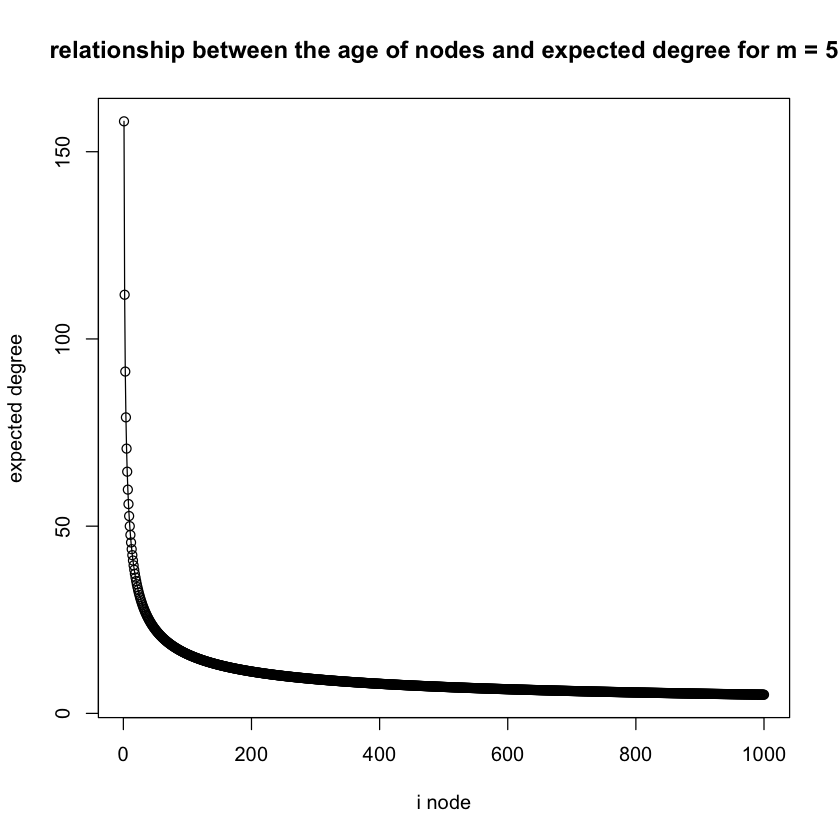

In [104]:
exp_deg <- integer(1000)
for (i in 1:1000){
    exp_deg[c(i)] <- 5 * sqrt(1000/i)
}
plot(exp_deg, type = "o", xlab = 'i node', ylab = 'expected degree',
     main ='relationship between the age of nodes and expected degree for m = 5')

- Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stubmatching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.

[1] 0.9261353

[1] 0.840194

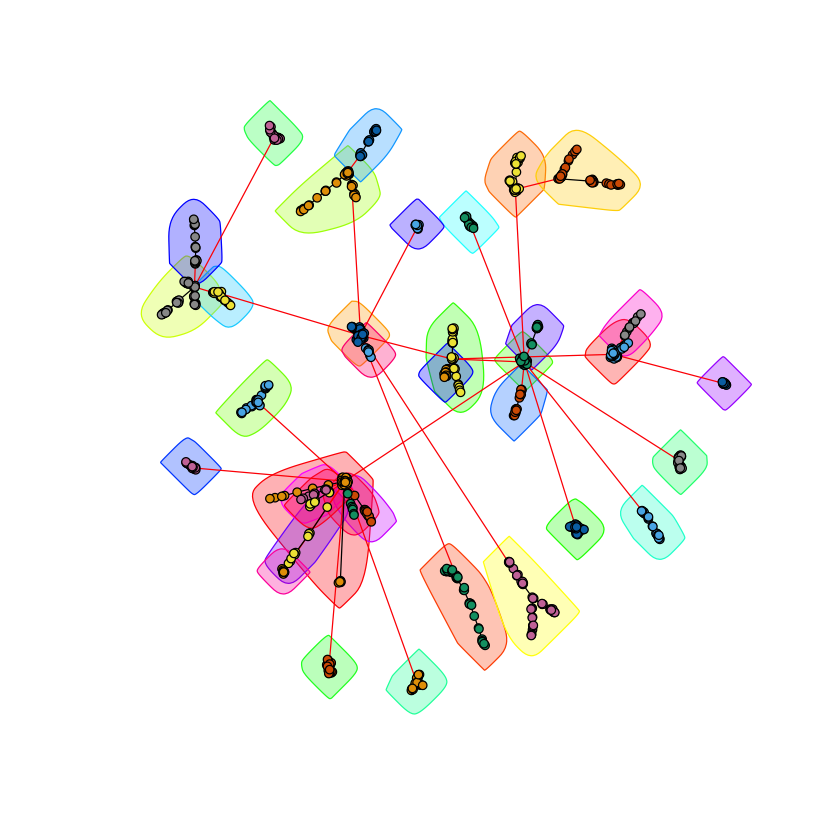

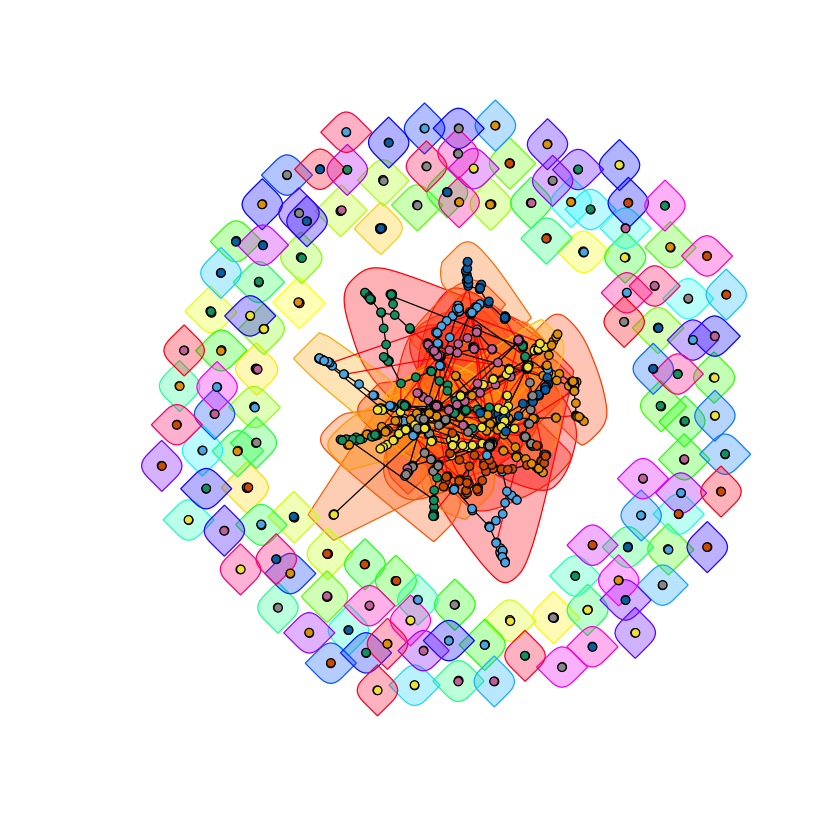

In [119]:
rm(list=ls()) # clear workspace 
g <- sample_pa(1000,m = 1,directed = FALSE)
fc <- cluster_fast_greedy(g)
modularity(fc)
fg <- fastgreedy.community(g)
plot(fg, g,vertex.size=3, vertex.label=NA)

deg_seq <- degree(g)
g_random <- sample_degseq(deg_seq, method="simple.no.multiple")
fc_random <- cluster_fast_greedy(g_random)
modularity(fc_random)
fg_random <- fastgreedy.community(g_random)
plot(fg_random, g_random,vertex.size=3, vertex.label=NA)